In [8]:
import pandas as pd

history = pd.read_csv('/Users/xuchao/Projects/Auto-doc-streamlit/workspace/data/publish_history.csv')
history

,内容标题,发表时间,总阅读人数,总阅读次数,总分享人数,总分享次数,阅读后关注人数,送达人数,公众号消息阅读次数,送达阅读率,首次分享次数,分享产生阅读次数,首次分享率,每次分享带来阅读次数,阅读完成率,内容url,账号名称
0,"AI祖师爷Geoffrey Hinton首次访华演讲：人类正在训练一群""数字老虎""，而笼子的...",2025-07-31,121.0,124.0,1.0,2.0,0.0,14.0,0.0,0.000,0.0,0.0,NaN,0.000,0.058,http://mp.weixin.qq.com/s?__biz=Mzk5MDY3NjYxMA...,AGI启示录
1,华为昇腾384超节点：AI算力的中国时刻，黄仁勋都服了？,2025-07-31,48.0,62.0,7.0,16.0,1.0,140.0,5.0,0.036,4.0,36.0,0.800,2.250,0.477,http://mp.weixin.qq.com/s?__biz=Mzk5MDQ1NTY4NQ...,AGI观察室
2,2025人工智能大会上，国产算力的肌肉秀,2025-07-31,20.0,42.0,1.0,8.0,1.0,10.0,6.0,0.600,5.0,22.0,0.833,2.750,0.400,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
3,靠设计和审美出海成功：Readdy.ai,2025-06-26,14.0,23.0,2.0,8.0,0.0,6.0,4.0,0.667,0.0,12.0,0.000,1.500,0.857,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGI启示录
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,30岁+了，学习还来得及吗？从案例到哲思的完整回答,2025-08-19,12.0,23.0,1.0,12.0,0.0,27.0,3.0,0.111,2.0,12.0,0.667,1.000,0.500,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
156,如何让大语言模型直接输出 JSON 格式数据？实用技巧分享,2025-08-25,4.0,6.0,0.0,0.0,0.0,41.0,1.0,0.024,0.0,0.0,0.000,NaN,0.667,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南
157,马斯克宣战：xAI将碾压谷歌，但真正的对手在中国,2025-08-25,3.0,5.0,0.0,0.0,1.0,41.0,0.0,0.000,0.0,0.0,NaN,NaN,0.667,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南
158,DeepSeek生态爆发：200+开源工具让AI彻底融入你的工作流,2025-08-22,280.0,309.0,53.0,65.0,1.0,40.0,7.0,0.175,54.0,23.0,7.714,0.354,0.390,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南


## 阅读量与发布时间的关系

In [11]:
# 查看“发表时间”字段的时间精度
print("发表时间样例：", history['发表时间'].dropna().head(10).tolist())
print("发表时间字段的类型：", history['发表时间'].dtype)


发表时间样例： [Timestamp('2025-07-31 00:00:00'), Timestamp('2025-07-31 00:00:00'), Timestamp('2025-07-31 00:00:00'), Timestamp('2025-06-26 00:00:00'), Timestamp('2025-08-15 00:00:00'), Timestamp('2025-08-12 00:00:00'), Timestamp('2025-08-09 00:00:00'), Timestamp('2025-08-07 00:00:00'), Timestamp('2025-08-06 00:00:00'), Timestamp('2025-08-05 00:00:00')]
发表时间字段的类型： datetime64[ns]


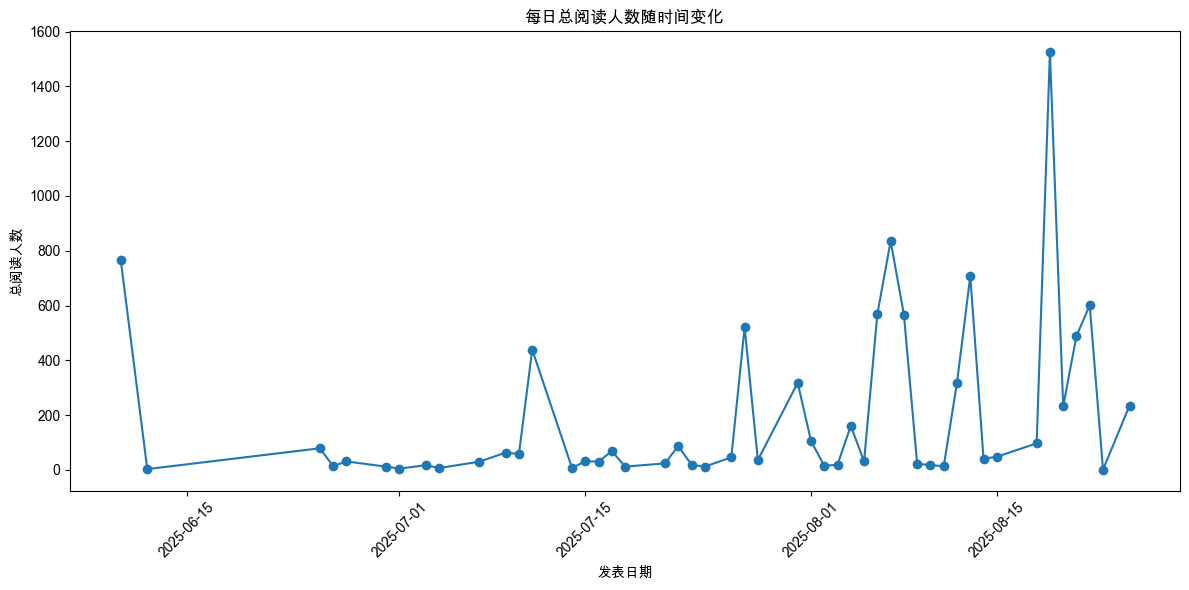

In [13]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'STHeiti', 'Heiti TC', 'PingFang SC', 'Hiragino Sans GB', 'SimHei', 'Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 确保'发表时间'为datetime类型
history['发表时间'] = pd.to_datetime(history['发表时间'], errors='coerce')

# 只保留有阅读人数和有效时间的数据
df = history.dropna(subset=['发表时间', '总阅读人数'])

# 按天统计每日总阅读量
daily_views = df.groupby(df['发表时间'].dt.date)['总阅读人数'].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_views.index, daily_views.values, marker='o')
plt.xlabel('发表日期')
plt.ylabel('总阅读人数')
plt.title('每日总阅读人数随时间变化')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
import requests
from bs4 import BeautifulSoup
import time

def fetch_wechat_article(url):
    """
    从微信公众号文章url中抓取正文内容和详细发表时间
    返回: (content, publish_time) 或 (None, None) 如果失败
    """
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
    }
    try:
        resp = requests.get(url, headers=headers, timeout=10)
        if resp.status_code != 200:
            print(f"请求失败: {url} 状态码: {resp.status_code}")
            return None, None
        soup = BeautifulSoup(resp.text, "html.parser")
        # 正文内容
        content_div = soup.find("div", id="js_content")
        content = content_div.get_text(separator="\n", strip=True) if content_div else None
        # 发表时间
        # 1. 尝试从js变量中提取
        import re
        match = re.search(r'var\s+publish_time\s*=\s*"([^"]+)"', resp.text)
        if match:
            publish_time = match.group(1)
        else:
            # 2. 尝试从meta标签
            meta_time = soup.find("meta", attrs={"property": "article:published_time"})
            if meta_time and meta_time.get("content"):
                publish_time = meta_time["content"]
            else:
                # 3. 尝试从页面可见时间
                time_span = soup.find("em", id="publish_time")
                publish_time = time_span.get_text(strip=True) if time_span else None
        return content, publish_time
    except Exception as e:
        print(f"抓取失败: {url} 错误: {e}")
        return None, None

        # 将抓取到的文章内容保存到原csv中


df = history.copy()

# 假设内容url列名为 "内容url"，内容正文列名为 "正文内容"
if "正文内容" not in df.columns:
    df["正文内容"] = None

for idx, row in df.iterrows():
    url = row.get("内容url")
    if pd.isna(url) or not isinstance(url, str) or not url.startswith("http"):
        continue
    # 如果已经有正文内容则跳过
    if pd.notna(row.get("正文内容")) and str(row.get("正文内容")).strip() != "":
        continue
    content, publish_time = fetch_wechat_article(url)
    if content:
        df.at[idx, "正文内容"] = content
    # 可选：如果想更新发表时间，也可以写入
    if publish_time and "详细发表时间" in df.columns:
        df.at[idx, "详细发表时间"] = publish_time
    # 避免请求过快
    time.sleep(1)

# 保存回csv
df.to_csv("new_df.csv", index=False)


In [16]:
new_df = pd.read_csv("new_df.csv")
new_df

,内容标题,发表时间,总阅读人数,总阅读次数,总分享人数,总分享次数,阅读后关注人数,送达人数,公众号消息阅读次数,送达阅读率,首次分享次数,分享产生阅读次数,首次分享率,每次分享带来阅读次数,阅读完成率,内容url,账号名称,正文内容
0,"AI祖师爷Geoffrey Hinton首次访华演讲：人类正在训练一群""数字老虎""，而笼子的...",2025-07-31,121.0,124.0,1.0,2.0,0.0,14.0,0.0,0.000,0.0,0.0,NaN,0.000,0.058,http://mp.weixin.qq.com/s?__biz=Mzk5MDY3NjYxMA...,AGI启示录,"当""AI教父""杰弗里·辛顿（Geoffrey Hinton）在WAIC舞台上说出""我们正在养..."
1,华为昇腾384超节点：AI算力的中国时刻，黄仁勋都服了？,2025-07-31,48.0,62.0,7.0,16.0,1.0,140.0,5.0,0.036,4.0,36.0,0.800,2.250,0.477,http://mp.weixin.qq.com/s?__biz=Mzk5MDQ1NTY4NQ...,AGI观察室,2025年7月26日，世界人工智能大会（WAIC）现场，华为昇腾384超节点（Atlas 9...
2,2025人工智能大会上，国产算力的肌肉秀,2025-07-31,20.0,42.0,1.0,8.0,1.0,10.0,6.0,0.600,5.0,22.0,0.833,2.750,0.400,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,2025年7月26日至29日，世界人工智能大会（WAIC 2025）在上海盛大举行。本届大会...
3,靠设计和审美出海成功：Readdy.ai,2025-06-26,14.0,23.0,2.0,8.0,0.0,6.0,4.0,0.667,0.0,12.0,0.000,1.500,0.857,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南,近期，一款来自中国的AI设计工具Readdy.ai正在国际市场上创造惊人增长奇迹。这款由国内...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGI启示录,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,30岁+了，学习还来得及吗？从案例到哲思的完整回答,2025-08-19,12.0,23.0,1.0,12.0,0.0,27.0,3.0,0.111,2.0,12.0,0.667,1.000,0.500,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,开篇：年龄从来不是学习的障碍\n答案是：不仅来得及，而且正是最好的时候！\n30岁+学习，你...
156,如何让大语言模型直接输出 JSON 格式数据？实用技巧分享,2025-08-25,4.0,6.0,0.0,0.0,0.0,41.0,1.0,0.024,0.0,0.0,0.000,NaN,0.667,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南,在 AI 圈子，尤其是做自动化和数据处理的同学，经常会遇到一个“老生常谈”的问题：\n大语言...
157,马斯克宣战：xAI将碾压谷歌，但真正的对手在中国,2025-08-25,3.0,5.0,0.0,0.0,1.0,41.0,0.0,0.000,0.0,0.0,NaN,NaN,0.667,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南,最近，马斯克在X（前Twitter）上又发声了。这次的主题，是他亲自带队的xAI，和全球AI...
158,DeepSeek生态爆发：200+开源工具让AI彻底融入你的工作流,2025-08-22,280.0,309.0,53.0,65.0,1.0,40.0,7.0,0.175,54.0,23.0,7.714,0.354,0.390,http://mp.weixin.qq.com/s?__biz=Mzk4ODc1NDc5Mg...,人工智能漫游指南,1. DeepSeek不只是AI模型，更是开源工具生态\n过去半年，DeepSeek从一个A...
